<a href="https://colab.research.google.com/github/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/blob/master/Traffic_Sign_Classification_Using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: PROJECT OVERVIEW 

![alt text](https://raw.githubusercontent.com/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/master/imgs/1.png)

![alt text](https://raw.githubusercontent.com/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/master/imgs/2.png)


# 2: IMPORT LIBRARIES/DATASETS

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

![alt text](https://raw.githubusercontent.com/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/master/imgs/3.png)

In [31]:
with open("/content/gdrive/My Drive/Colab Notebooks/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/gdrive/My Drive/Colab Notebooks/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/gdrive/My Drive/Colab Notebooks/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [32]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [33]:
X_train.shape

(34799, 32, 32, 3)

# 3: PERFORM IMAGES VISUALIZATION

12

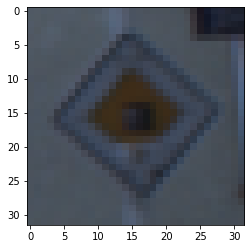

In [37]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

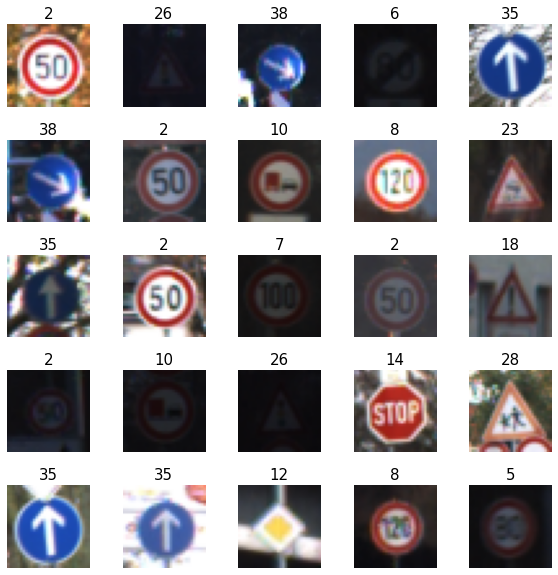

In [38]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)   


# 4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION


In [39]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [40]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [41]:
X_train_gray.shape

(34799, 32, 32, 1)

In [43]:
X_train_gray_norm = (X_train_gray -128) / 128
X_test_gray_norm = (X_test_gray -128) / 128
X_validation_gray_norm = (X_validation_gray -128) / 128


In [44]:
X_train_gray_norm

array([[[[-0.4921875 ],
         [-0.53385417],
         [-0.51822917],
         ...,
         [-0.515625  ],
         [-0.46875   ],
         [-0.44270833]],

        [[-0.51041667],
         [-0.5234375 ],
         [-0.55989583],
         ...,
         [-0.53125   ],
         [-0.49479167],
         [-0.44270833]],

        [[-0.53125   ],
         [-0.50260417],
         [-0.54947917],
         ...,
         [-0.5078125 ],
         [-0.49479167],
         [-0.45833333]],

        ...,

        [[-0.41145833],
         [-0.48958333],
         [-0.57291667],
         ...,
         [-0.375     ],
         [-0.41666667],
         [-0.390625  ]],

        [[-0.4140625 ],
         [-0.5078125 ],
         [-0.6015625 ],
         ...,
         [-0.42447917],
         [-0.42708333],
         [-0.38802083]],

        [[-0.45052083],
         [-0.5390625 ],
         [-0.6328125 ],
         ...,
         [-0.43489583],
         [-0.43229167],
         [-0.38802083]]],


       [[[-0.5390625 ],


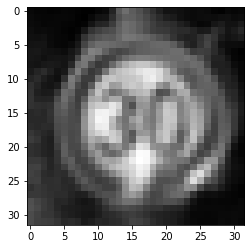

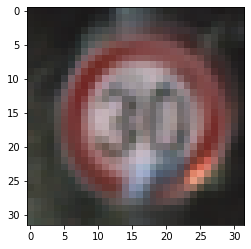

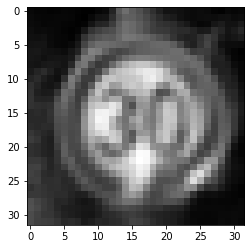

In [45]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# 5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

![alt text](https://raw.githubusercontent.com/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/master/imgs/4.png)

![alt text](https://raw.githubusercontent.com/FatmaElZahraaSamir/Traffic-Sign-Classification-Using-DL/master/imgs/5.png)

# 6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [46]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))  

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# 7: COMPILE AND TRAIN DEEP CNN MODEL

In [47]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [48]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 16s 228ms/step - loss: 3.2457 - accuracy: 0.1585 - val_loss: 2.8445 - val_accuracy: 0.2757
Epoch 2/50
70/70 [==============================] - 16s 230ms/step - loss: 1.9516 - accuracy: 0.4592 - val_loss: 1.5797 - val_accuracy: 0.5832
Epoch 3/50
70/70 [==============================] - 16s 230ms/step - loss: 1.1722 - accuracy: 0.6567 - val_loss: 1.0820 - val_accuracy: 0.7005
Epoch 4/50
70/70 [==============================] - 16s 229ms/step - loss: 0.8250 - accuracy: 0.7563 - val_loss: 0.8596 - val_accuracy: 0.7592
Epoch 5/50
70/70 [==============================] - 16s 231ms/step - loss: 0.6563 - accuracy: 0.8112 - val_loss: 0.7361 - val_accuracy: 0.7932
Epoch 6/50
70/70 [==============================] - 16s 229ms/step - loss: 0.5524 - accuracy: 0.8401 - val_loss: 0.7140 - val_accuracy: 0.8082
Epoch 7/50
70/70 [==============================] - 16s 229ms/step - loss: 0.4776 - accuracy: 0.8634 - val_loss: 0.6507 - val_accuracy: 0.8290

# 8: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [49]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 4s 10ms/step - loss: 0.6396 - accuracy: 0.8975
Test Accuracy: 0.8975455164909363


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

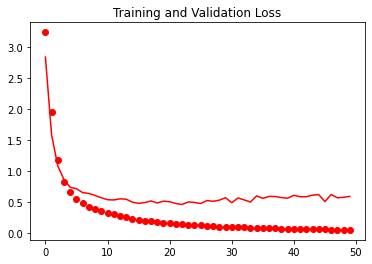

In [52]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

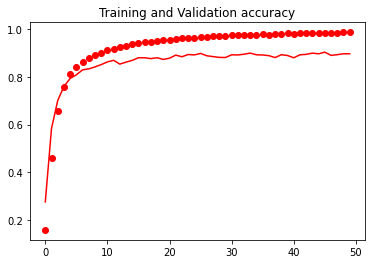

In [53]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


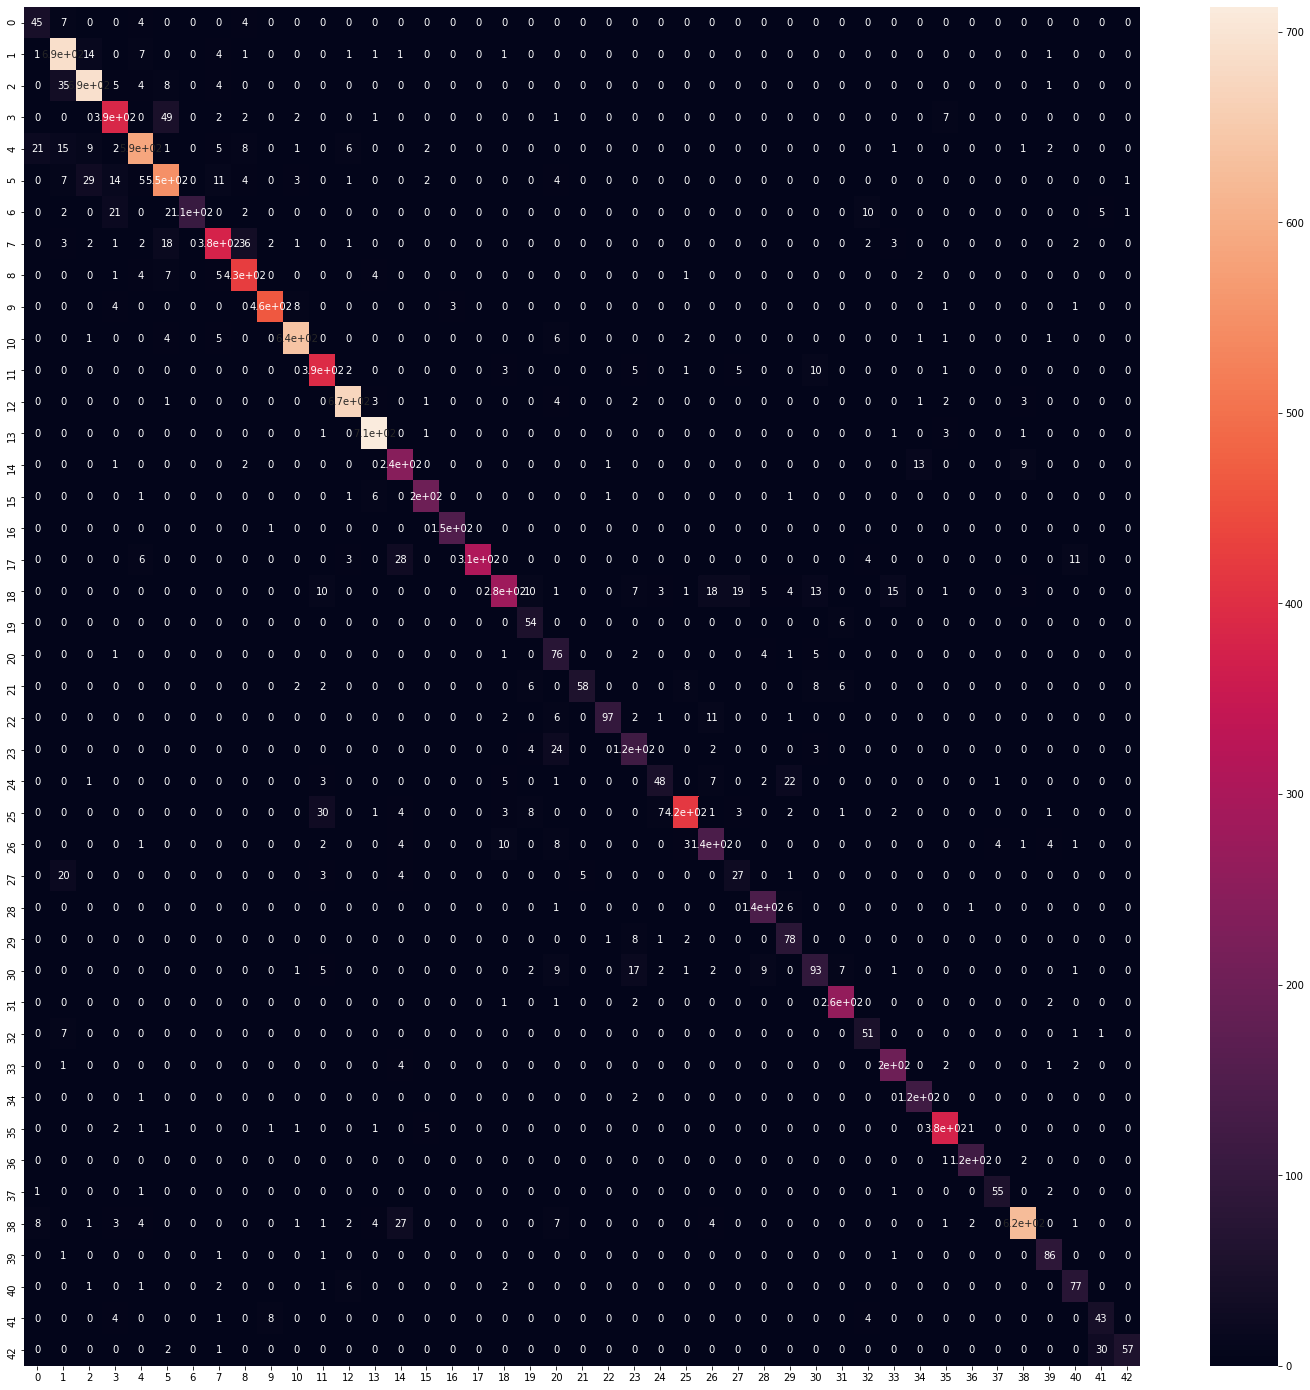

In [54]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

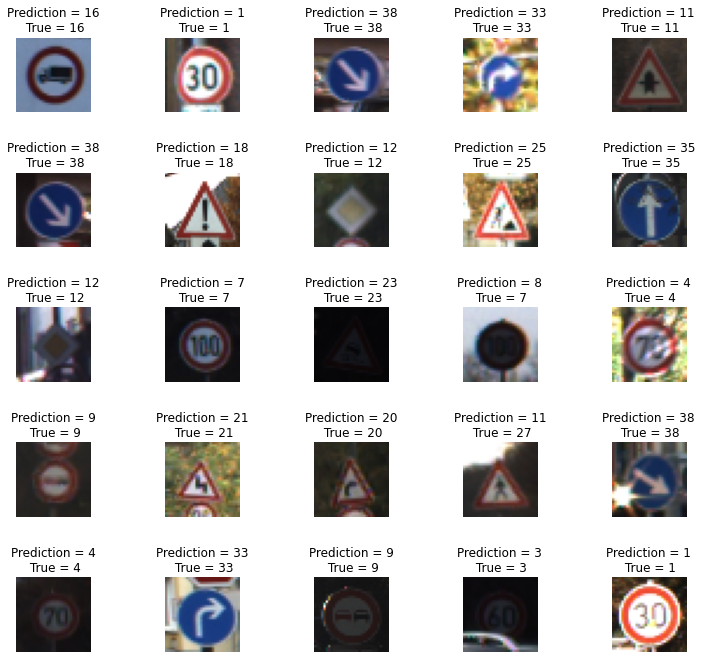

In [55]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
